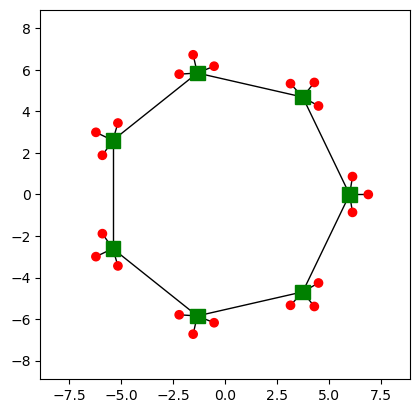

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_squares_and_outer_circles(num_squares, large_radius, square_size, circle_radius, circle_distance, num_circles_per_square):
    # Set up the figure and axis
    fig, ax = plt.subplots()

    # Define the center of the larger circle
    center_x, center_y = 0, 0

    # Calculate positions for the squares
    angles = np.linspace(0, 2 * np.pi, num_squares, endpoint=False)
    square_positions = []
    for angle in angles:
        x = center_x + large_radius * np.cos(angle)
        y = center_y + large_radius * np.sin(angle)
        square_positions.append((x, y))

    # Draw lines connecting squares to their circles
    for i, (x, y) in enumerate(square_positions):
        angle = angles[i]
        sub_angles = np.linspace(0, 2 * np.pi, num_circles_per_square, endpoint=False)  # Distribute circles evenly
        circle_positions = [
            (x + circle_distance * np.cos(angle + offset), y + circle_distance * np.sin(angle + offset))
            for offset in sub_angles
        ]
        
        # Adjust circles to ensure they are outside the main circle
        adjusted_circle_positions = [
            (cx, cy) if np.sqrt(cx**2 + cy**2) > large_radius else
            (cx * (large_radius + circle_radius) / np.sqrt(cx**2 + cy**2), cy * (large_radius + circle_radius) / np.sqrt(cx**2 + cy**2))
            for cx, cy in circle_positions
        ]

        # Draw lines connecting circles to squares
        for cx, cy in adjusted_circle_positions:
            ax.plot([x, cx], [y, cy], color='black', linestyle='-', linewidth=1)

    # Draw lines connecting adjacent squares
    for i in range(num_squares):
        x1, y1 = square_positions[i]
        x2, y2 = square_positions[(i + 1) % num_squares]
        ax.plot([x1, x2], [y1, y2], color='black', linestyle='-', linewidth=1)

    # Add squares
    for x, y in square_positions:
        square = plt.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size, color='green', zorder=2)
        ax.add_patch(square)

    # Add circles outside the larger circle
    for i, (x, y) in enumerate(square_positions):
        angle = angles[i]
        sub_angles = np.linspace(0, 2 * np.pi, num_circles_per_square, endpoint=False)
        circle_positions = [
            (x + circle_distance * np.cos(angle + offset), y + circle_distance * np.sin(angle + offset))
            for offset in sub_angles
        ]

        adjusted_circle_positions = [
            (cx, cy) if np.sqrt(cx**2 + cy**2) > large_radius else
            (cx * (large_radius + circle_radius) / np.sqrt(cx**2 + cy**2), cy * (large_radius + circle_radius) / np.sqrt(cx**2 + cy**2))
            for cx, cy in circle_positions
        ]

        for cx, cy in adjusted_circle_positions:
            circle = plt.Circle((cx, cy), circle_radius, color='red', zorder=3)
            ax.add_patch(circle)

    # Set the axis limits
    ax.set_xlim(-large_radius - circle_distance - 2, large_radius + circle_distance + 2)
    ax.set_ylim(-large_radius - circle_distance - 2, large_radius + circle_distance + 2)

    # Keep the aspect ratio square
    ax.set_aspect('equal')

    # Display the shapes and connections
    plt.show()

# Parameters: number of squares, radius of the larger circle, size of the squares, radius of the circles, distance to circles, and number of circles per square
draw_squares_and_outer_circles(num_squares=7, large_radius=6, square_size=0.7, circle_radius=0.2, 
                               circle_distance=0.9, num_circles_per_square=3)

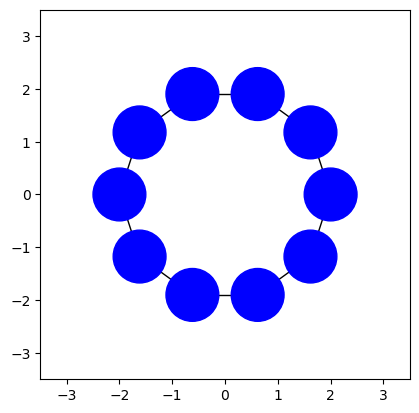

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_circles_with_lines(num_circles, large_radius, small_radius):
    # Set up the figure and axis
    fig, ax = plt.subplots()
    
    # Define the center of the larger circle
    center_x, center_y = 0, 0

    # Calculate positions for the smaller circles
    angles = np.linspace(0, 2 * np.pi, num_circles, endpoint=False)
    positions = []  # Store the positions of the circles for connecting them with lines
    for angle in angles:
        x = center_x + large_radius * np.cos(angle)
        y = center_y + large_radius * np.sin(angle)
        positions.append((x, y))

    # Draw lines connecting adjacent circles first
    for i in range(num_circles):
        x1, y1 = positions[i]
        x2, y2 = positions[(i + 1) % num_circles]  # Wrap around to connect the last to the first
        ax.plot([x1, x2], [y1, y2], color='black', linestyle='-', linewidth=1)

    # Add circles after the lines so they appear on top
    for x, y in positions:
        circle = plt.Circle((x, y), small_radius, color='blue', zorder=2)
        ax.add_patch(circle)

    # Set the axis limits
    ax.set_xlim(-large_radius - small_radius - 1, large_radius + small_radius + 1)
    ax.set_ylim(-large_radius - small_radius - 1, large_radius + small_radius + 1)

    # Keep the aspect ratio square
    ax.set_aspect('equal')

    # Display the circles and lines
    plt.show()

# Parameters: number of circles, radius of the larger circle, radius of smaller circles
draw_circles_with_lines(num_circles=10, large_radius=2, small_radius=0.5)

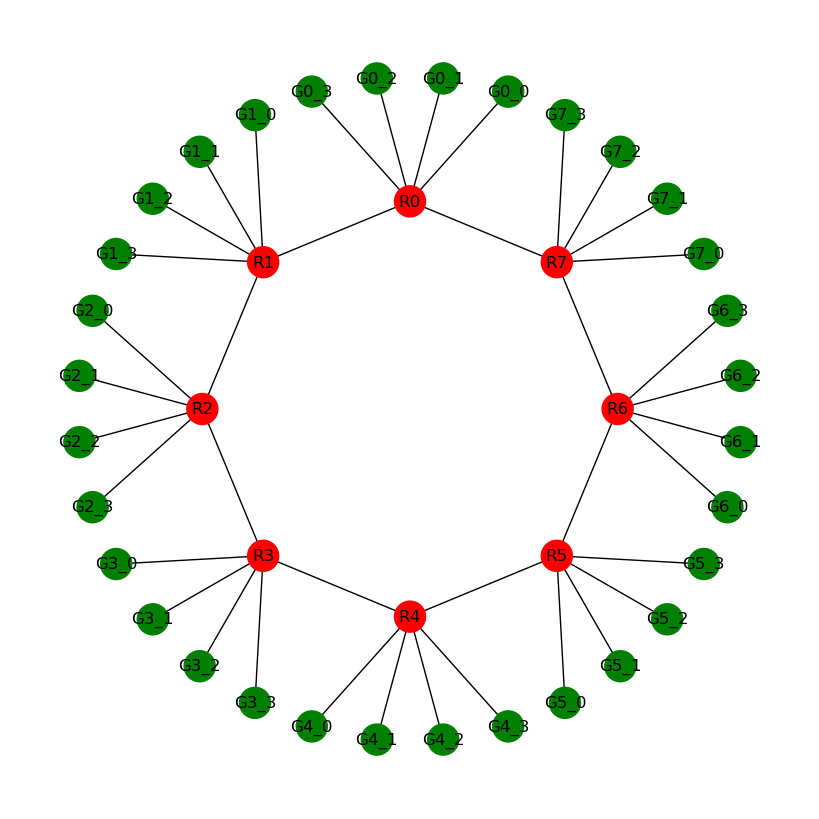

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def draw_graph_grouped_green(num_red, num_green_per_red, outer_radius, inner_radius, group_spread=0.3):
    G = nx.Graph()

    # Красные узлы (внутренний круг) — `R0` начинается сверху (угол = 90°)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_red, endpoint=False)  # Смещение так, чтобы `R0` оказался сверху
    red_positions = {
        f"R{i}": (inner_radius * np.cos(angle), inner_radius * np.sin(angle))
        for i, angle in enumerate(angles)
    }

    # Зеленые узлы (внешний круг), группируя их рядом друг с другом
    green_positions = {}
    for i, angle in enumerate(angles):
        sub_angles = np.linspace(-group_spread, group_spread, num_green_per_red)  # Распределяем рядом
        for j, offset in enumerate(sub_angles):
            gx = outer_radius * np.cos(angle + offset)
            gy = outer_radius * np.sin(angle + offset)
            green_positions[f"G{i}_{j}"] = (gx, gy)
            G.add_edge(f"G{i}_{j}", f"R{i}")  # Связываем зелёные узлы с соответствующими красными

    # Соединяем красные узлы между собой (образуют внутреннее кольцо)
    red_keys = list(red_positions.keys())
    for i in range(num_red):
        G.add_edge(red_keys[i], red_keys[(i + 1) % num_red])

    # Объединяем позиции узлов
    pos = {**red_positions, **green_positions}

    # Отображаем граф
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_color=["red" if n.startswith("R") else "green" for n in G.nodes()],
            edge_color="black", node_size=500)
    plt.show()

# Пример использования
draw_graph_grouped_green(num_red=8, num_green_per_red=4, outer_radius=8, inner_radius=5)

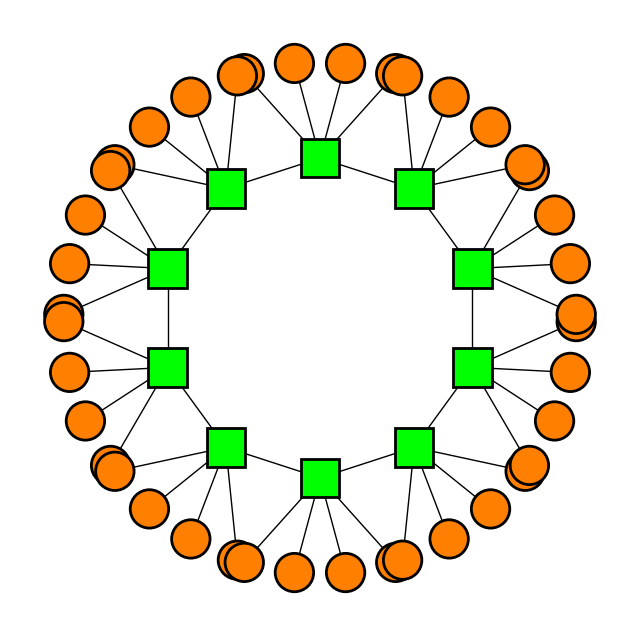

In [173]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_graph_grouped(num_red, num_orange_per_red, outer_radius, inner_radius, group_spread=0.3, square_size=0.2, circle_size=0.5, fig_size=(8, 8)):
    G = nx.Graph()

    # Ярко-зелёные узлы (внутренний круг) — `R0` начинается сверху
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_red, endpoint=False)  # `R0` в верхней позиции
    green_positions = {
        f"R{i}": (inner_radius * np.cos(angle), inner_radius * np.sin(angle))
        for i, angle in enumerate(angles)
    }

    # Оранжевые узлы (внешний круг), если их **только один**, он будет перпендикулярен зелёному узлу
    orange_positions = {}
    for i, angle in enumerate(angles):
        if num_orange_per_red == 1:
            ox = outer_radius * np.cos(angle)  # Перпендикулярный узел
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_0"] = (ox, oy)
            G.add_edge(f"G{i}_0", f"R{i}")  # Связываем единственный оранжевый узел с зелёным
        else:
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_red)  # Распределяем рядом
            for j, offset in enumerate(sub_angles):
                ox = outer_radius * np.cos(angle + offset)
                oy = outer_radius * np.sin(angle + offset)
                orange_positions[f"G{i}_{j}"] = (ox, oy)
                G.add_edge(f"G{i}_{j}", f"R{i}")  # Связываем оранжевые узлы с зелёными

    # Соединяем зелёные узлы между собой (образуют внутреннее кольцо)
    green_keys = list(green_positions.keys())
    for i in range(num_red):
        G.add_edge(green_keys[i], green_keys[(i + 1) % num_red])

    # Объединяем позиции узлов
    pos = {**green_positions, **orange_positions}

    # Указываем фиксированный размер рендера
    fig, ax = plt.subplots(figsize=fig_size)
    nx.draw(G, pos, node_size=500, edge_color="black", ax=ax)  # Без подписей узлов

    # Рисуем **ярко-зелёные** квадраты с черной рамкой
    for key, (x, y) in green_positions.items():
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor=(0/255, 255/255, 0/255), edgecolor="black", linewidth=2, zorder=3)
        ax.add_patch(square)

    # Рисуем **оранжевые узлы** как кружки с черной рамкой
    for key, (x, y) in orange_positions.items():
        circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
        ax.add_patch(circle)

    plt.show()

# Пример использования с фиксированным размером рендера
draw_graph_grouped(num_red=10, num_orange_per_red=4, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, fig_size=(8, 8))

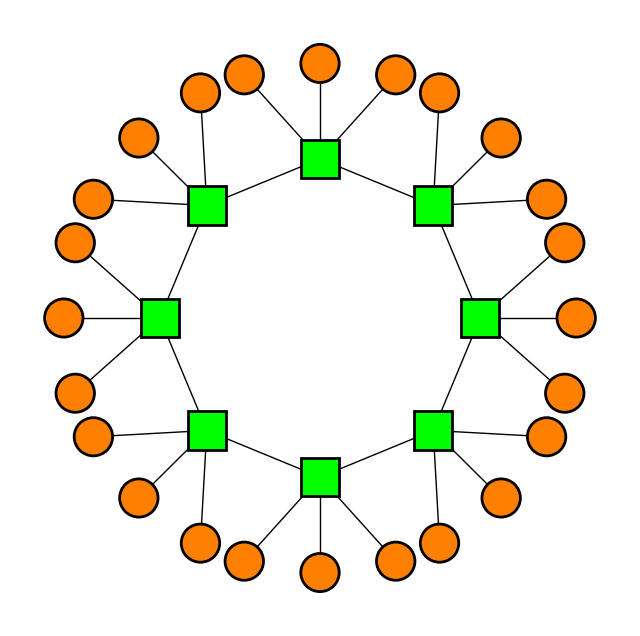

In [213]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_graph_grouped(num_red, num_orange_per_red, outer_radius, inner_radius, group_spread=0.3, square_size=0.2, circle_size=0.5, fig_size=(8, 8)):
    G = nx.Graph()

    # Ярко-зелёные узлы (внутренний круг) — `R0` начинается сверху
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_red, endpoint=False)  # `R0` в верхней позиции
    green_positions = {
        f"R{i}": (inner_radius * np.cos(angle), inner_radius * np.sin(angle))
        for i, angle in enumerate(angles)
    }

    # Оранжевые узлы (внешний круг), если их **только один**, он будет перпендикулярен зелёному узлу
    orange_positions = {}
    for i, angle in enumerate(angles):
        if num_orange_per_red == 1:
            ox = outer_radius * np.cos(angle)  # Перпендикулярный узел
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_0"] = (ox, oy)
            G.add_edge(f"G{i}_0", f"R{i}")  # Связываем единственный оранжевый узел с зелёным
        elif num_orange_per_red <= 3:
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_red)  # Распределяем рядом
            for j, offset in enumerate(sub_angles):
                ox = outer_radius * np.cos(angle + offset)
                oy = outer_radius * np.sin(angle + offset)
                orange_positions[f"G{i}_{j}"] = (ox, oy)
                G.add_edge(f"G{i}_{j}", f"R{i}")  # Связываем оранжевые узлы с зелёными
        else:
            # Один большой круг с числовой меткой
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_sum"] = (ox, oy)
            G.add_edge(f"G{i}_sum", f"R{i}")  # Один обобщённый узел

    # Соединяем зелёные узлы между собой (образуют внутреннее кольцо)
    green_keys = list(green_positions.keys())
    for i in range(num_red):
        G.add_edge(green_keys[i], green_keys[(i + 1) % num_red])

    # Объединяем позиции узлов
    pos = {**green_positions, **orange_positions}

    # Указываем фиксированный размер рендера
    fig, ax = plt.subplots(figsize=fig_size)
    nx.draw(G, pos, node_size=500, edge_color="black", ax=ax)  # Без подписей узлов

    # Рисуем **ярко-зелёные** квадраты с черной рамкой
    for key, (x, y) in green_positions.items():
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor=(0/255, 255/255, 0/255), edgecolor="black", linewidth=2, zorder=3)
        ax.add_patch(square)

    # Рисуем **оранжевые узлы** как кружки с черной рамкой
    for key, (x, y) in orange_positions.items():
        if key.endswith("_sum"):
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
            ax.add_patch(circle)
            # Добавляем число в кружок с `bbox` и `zorder=5`
            ax.text(x, y, str(num_orange_per_red), color="black", fontsize=10, ha="center", va="center",
                    fontweight="bold", bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.2"), zorder=5)
        else:
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
            ax.add_patch(circle)

    plt.show()

# Пример использования с фиксированным размером рендера
draw_graph_grouped(num_red=8, num_orange_per_red=3, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, fig_size=(8, 8))

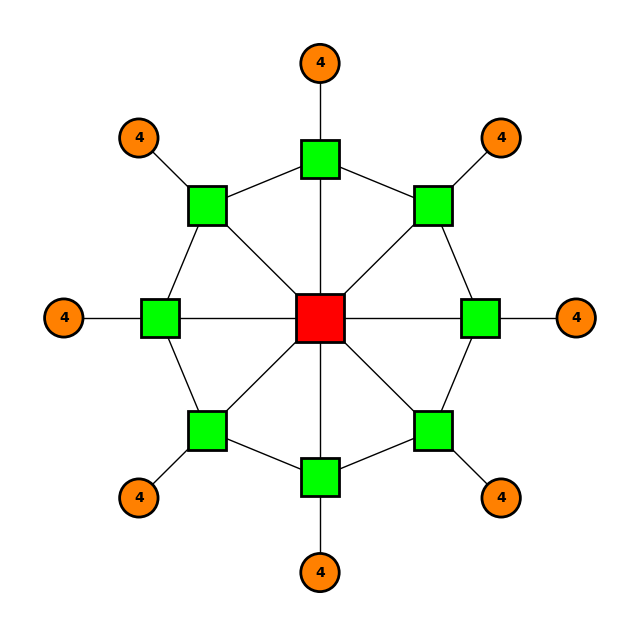

In [228]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_graph_grouped(num_red, num_orange_per_red, outer_radius, inner_radius, group_spread=0.3, square_size=0.2, circle_size=0.5, fig_size=(8, 8), center_size=0.4):
    G = nx.Graph()

    # Центральный узел (красный квадрат)
    center_position = {"C": (0, 0)}

    # Ярко-зелёные узлы (внутренний круг)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_red, endpoint=False)
    green_positions = {
        f"R{i}": (inner_radius * np.cos(angle), inner_radius * np.sin(angle))
        for i, angle in enumerate(angles)
    }

    # Связываем центральный узел `C` с зелеными узлами `R`
    for key in green_positions:
        G.add_edge("C", key)

    # Оранжевые узлы (внешний круг)
    orange_positions = {}
    for i, angle in enumerate(angles):
        if num_orange_per_red == 1:
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_0"] = (ox, oy)
            G.add_edge(f"G{i}_0", f"R{i}")  
        elif num_orange_per_red <= 3:
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_red)
            for j, offset in enumerate(sub_angles):
                ox = outer_radius * np.cos(angle + offset)
                oy = outer_radius * np.sin(angle + offset)
                orange_positions[f"G{i}_{j}"] = (ox, oy)
                G.add_edge(f"G{i}_{j}", f"R{i}")  
        else:
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_sum"] = (ox, oy)
            G.add_edge(f"G{i}_sum", f"R{i}")  

    # Соединяем зелёные узлы между собой (образуют внутреннее кольцо)
    green_keys = list(green_positions.keys())
    for i in range(num_red):
        G.add_edge(green_keys[i], green_keys[(i + 1) % num_red])

    pos = {**center_position, **green_positions, **orange_positions}

    # Фиксированный размер рендера
    fig, ax = plt.subplots(figsize=fig_size)
    nx.draw(G, pos, node_size=500, edge_color="black", ax=ax)

    # Рисуем **центральный красный квадрат**
    for key, (x, y) in center_position.items():
        square = patches.Rectangle((x - center_size / 2, y - center_size / 2), center_size, center_size,
                                   facecolor="red", edgecolor="black", linewidth=2, zorder=3)
        ax.add_patch(square)

    # Рисуем **ярко-зелёные** квадраты (узлы `R`)
    for key, (x, y) in green_positions.items():
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor=(0/255, 255/255, 0/255), edgecolor="black", linewidth=2, zorder=3)
        ax.add_patch(square)

    # Рисуем **оранжевые кружки** (узлы `G`)  
    for key, (x, y) in orange_positions.items():
        if key.endswith("_sum"):
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
            ax.add_patch(circle)
            ax.text(x, y, str(num_orange_per_red), color="black", fontsize=10, ha="center", va="center",
                    fontweight="bold", zorder=5)
        else:
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
            ax.add_patch(circle)

    plt.show()

# Пример использования с центральным узлом
draw_graph_grouped(num_red=8, num_orange_per_red=4, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, center_size=1.5, fig_size=(8, 8))

Graph saved as graph_output.pdf
Graph saved as graph_output.png
Graph saved as graph_output.svg


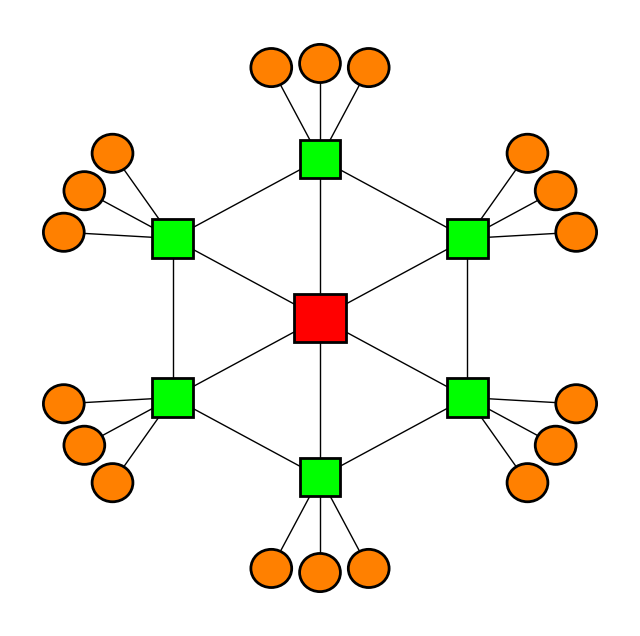

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_graph_grouped(num_red, num_orange_per_red, outer_radius, inner_radius, group_spread=0.18, square_size=0.2, circle_size=0.5, center_size=0.4):
    G = nx.Graph()

    # Central node (red square)
    center_position = {"C": (0, 0)}

    # Green nodes (inner circle)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_red, endpoint=False)
    green_positions = {
        f"R{i}": (inner_radius * np.cos(angle), inner_radius * np.sin(angle))
        for i, angle in enumerate(angles)
    }

    # Connect central node `C` with all green nodes `R`
    for key in green_positions:
        G.add_edge("C", key)

    # Orange nodes (outer circle)
    orange_positions = {}
    for i, angle in enumerate(angles):
        if num_orange_per_red == 1:
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_0"] = (ox, oy)
            # G.add_edge(f"G{i}_0", f"R{i}")  
        elif num_orange_per_red <= 3:
            # sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_red)
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_red)  # Adjust spacing
            for j, offset in enumerate(sub_angles):
                ox = outer_radius * np.cos(angle + offset)
                oy = outer_radius * np.sin(angle + offset)
                orange_positions[f"G{i}_{j}"] = (ox, oy)
                G.add_edge(f"G{i}_{j}", f"R{i}")  
        else:
            # Combine multiple orange nodes into one with a number inside
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_sum"] = (ox, oy)
            G.add_edge(f"G{i}_sum", f"R{i}")  

    # Connect green nodes (inner circle) in sequence
    green_keys = list(green_positions.keys())
    for i in range(num_red):
        G.add_edge(green_keys[i], green_keys[(i + 1) % num_red])

    pos = {**center_position, **green_positions, **orange_positions}

    # Create figure with correct aspect ratio
    fig, ax = plt.subplots(figsize=(8, 8))  

    nx.draw(G, pos, node_size=500, edge_color="black", ax=ax)

    # Draw central red square
    for key, (x, y) in center_position.items():
        square = patches.Rectangle((x - center_size / 2, y - center_size / 2), center_size, center_size,
                                   facecolor="red", edgecolor="black", linewidth=2, zorder=3)
        ax.add_patch(square)

    # Draw green squares (nodes `R`)
    for key, (x, y) in green_positions.items():
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor=(0/255, 255/255, 0/255), edgecolor="black", linewidth=2, zorder=3)
        ax.add_patch(square)

    # Draw orange circles (nodes `G`)  
    for key, (x, y) in orange_positions.items():
        if key.endswith("_sum"):
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
            ax.add_patch(circle)
            ax.text(x, y, str(num_orange_per_red), color="black", fontsize=10, ha="center", va="center",
                    fontweight="bold", zorder=5)
        else:
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=2, zorder=4)
            ax.add_patch(circle)

    return fig

# Function to save graph in different formats (PDF, PNG, SVG)
def save_graph(fig, filename, format="pdf", dpi=300):
    filepath = f"{filename}.{format}"
    
    # Set correct size before saving to avoid distortions
    fig.set_size_inches(8, 8)  
    
    fig.savefig(filepath, format=format, dpi=dpi, bbox_inches="tight")  
    print(f"Graph saved as {filepath}")

# Example usage
fig = draw_graph_grouped(num_red=6, num_orange_per_red=3, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, center_size=1.5)

# Save in PDF, PNG, and SVG formats
save_graph(fig, "graph_output", format="pdf")
save_graph(fig, "graph_output", format="png")
save_graph(fig, "graph_output", format="svg")